<a href="https://colab.research.google.com/github/ashleychoi121/Stroke-Project/blob/main/24_10_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Dataset is from Kaggle.com. https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=stroke_data.csv

import pandas as pd
df = pd.read_csv('stroke_data.csv')

In [ ]:
df_2 = df.copy()

In [ ]:
df_2

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


Data of storke patients has been used for this project. The variables are sex, age, has heart diease, average glucose level, bmi, etc. about the patients. The target value will be where the patient had stoke or not. 0 represents did not have stroke and 1 represents had stroke.

In [ ]:
# Removing data with any NaN values.
df_2 = df_2.dropna()

In [ ]:
df_2.shape

(40907, 11)

The dataset has total 11 variables including the target variable and 40907 number of non-null data.

In [ ]:
np.random.seed(123)
# Select 10000 data randomly due to too large number of data.
indices = np.random.choice(40907,10000)
df_2 = df_2.loc[indices,:]

print(df_2.shape)

(10000, 11)


In [ ]:
#defining X and Y variables and standarize X.
from sklearn.preprocessing import StandardScaler
X=df_2.drop(['stroke'], axis=1)
Y=df_2.stroke

X_std=StandardScaler().fit_transform(X)

In [ ]:
# PCA Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)

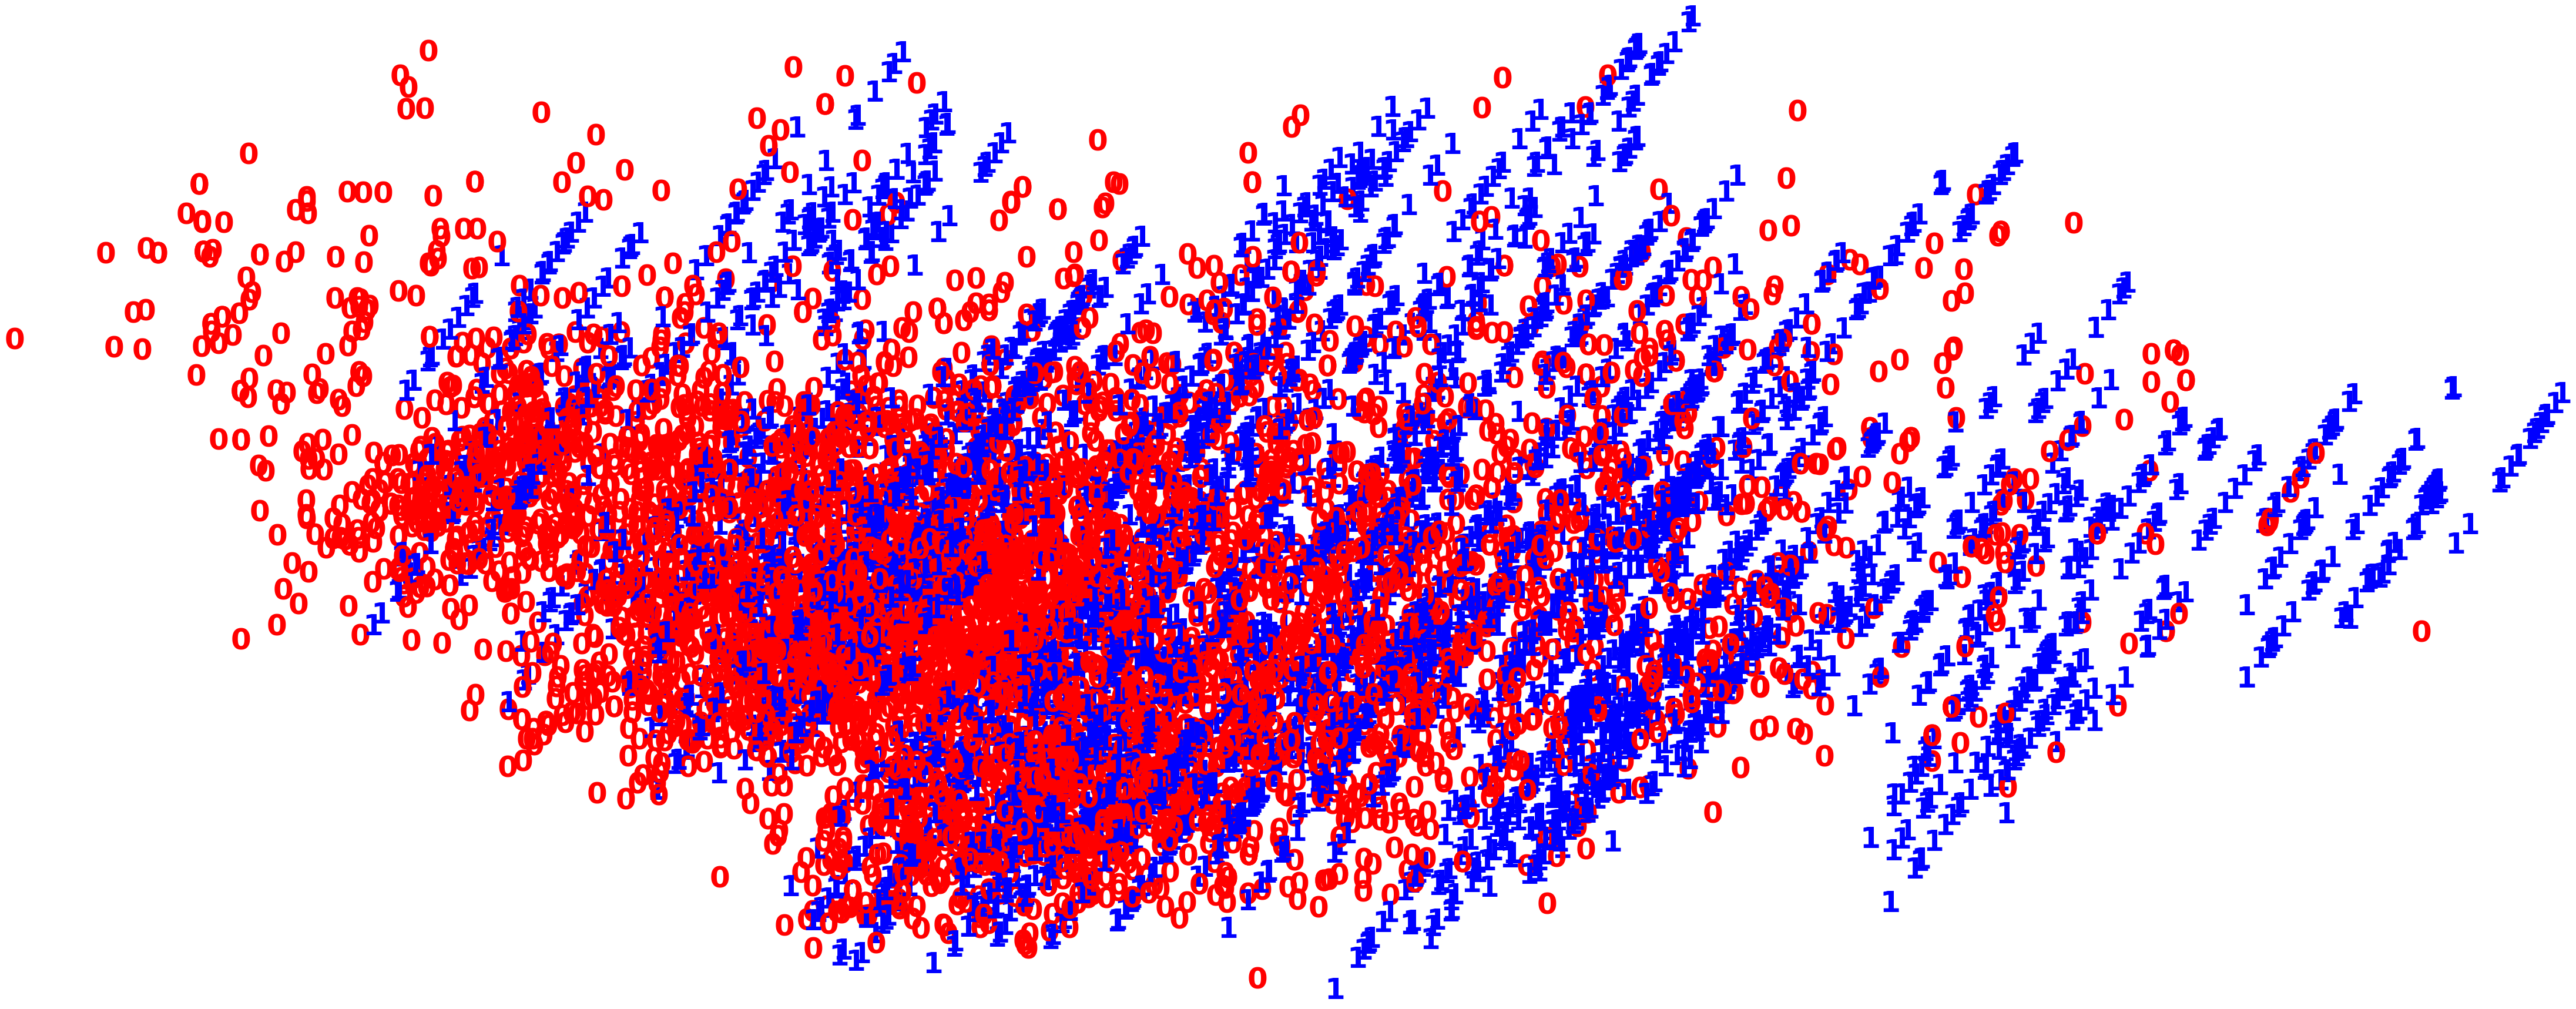

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(Y.iloc[i]),
             color=colours[int(Y.iloc[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

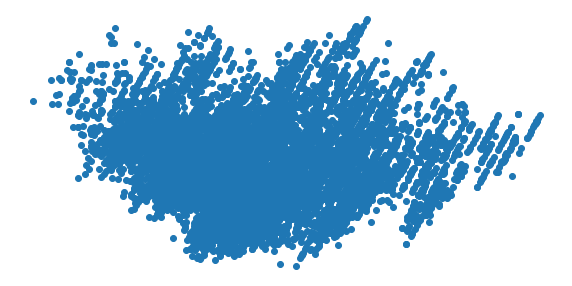

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Dimensionality reduction with PCA has been used for the first method. Visidually, it did not give a favorable result. 

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.449869
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.793182
[t-SNE] KL divergence after 300 iterations: 2.316558


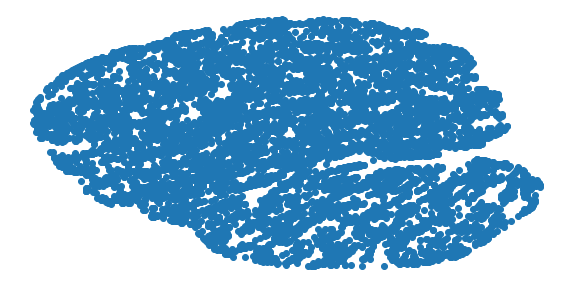

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE was the second dimetionality reduction method used for this project. number of components of 2, verbose of 1, perplexity of 40, and number of iteration of 300 were used for the parameters. Althought it took longer time to execute the model, it has given a better results compared to PCA. 

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 0.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.965562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.361771
[t-SNE] KL divergence after 300 iterations: 2.045621


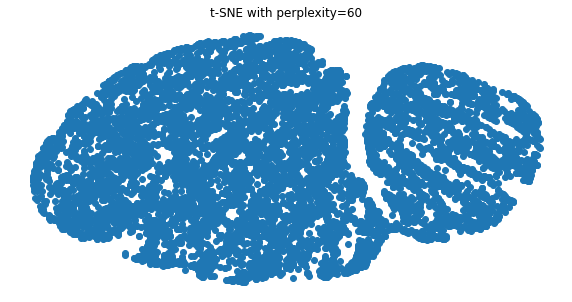

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=60")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Different perplexity has been applied to see if it would give a better results. So, number of components of 2, verbose of 1, perplexity of 60, and number of iteration of 300 were used for this model of t_SNE. It still gives better results compared to PCA. It is not obvious, but the graph of perplexity of 60 deemed more clear.  

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

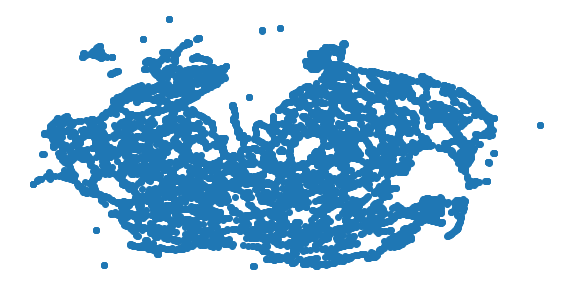

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP was the last Dimentionality Reduction method used for this project. For the parameter of the model, number of neighbors of 5, minimum distance of 0.3,
metric of 'correlation' were used. It was slower than PCA but faster than t-SNE. Visually, UMAP did not give any better result compared to t-SNE. 

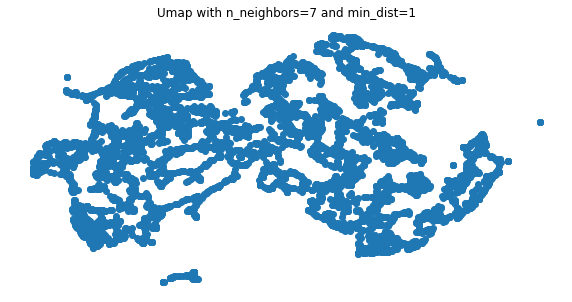

In [ ]:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Different parameters, increased number of neighbors to 7 and decreaed minimum distance to 0.1, were used for another UMAP model. It looks more clustered compared to the previous UMAP model, but t-SNE model give more preferable result.

Among three different dimentionality reduction methods (PCA, t-SNE, and UMAP), t-SNE is the best performing method for Stroke data. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(pca_components)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(pca_components)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(Y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(Y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(Y, pred_4)))

ARI for two cluster k-means: 0.07652620794938793
ARI for three cluster k-means: 0.04640141662037165
ARI for four cluster k-means: 0.03982181994495935


Clustering for the data has been performed. For the first clustering method, K-Means has been applied for number of clusters of 2, 3, and 4. As there are two values for the target variable, ARI for two clusters gave the best results.

In [ ]:
print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(pca_components, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(pca_components, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(pca_components, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.38235026357570534
Silhouette score for three cluster k-means: 0.36659865704671163
Silhouette score for four cluster k-means: 0.3626064444870421


The k_means models overall give good silhouette scores. And just like ARI, two-cluster model gives the best silhouette score among three cluster models. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)


# Fit model
clusters = agg_cluster.fit_predict(pca_components)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(Y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(pca_components, clusters, metric='euclidean')))

ARI score of linkage method average: 0.008401815067763541
Silhouette score of linkage method average: 0.28683529041032396


Compared to Agglomerative Clusting model, K-Means model gives better scores in both ARI and Silhouette score.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

clusters = dbscan_cluster.fit_predict(X_std)

print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(Y, clusters)))
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))

Adjusted Rand Index of the DBSCAN solution: 0.009163533515806418
The silhouette score of the DBSCAN solution: -0.3875673232410554


DBSCAN model's ARI and Silhouette score are not so favorable. 

In [ ]:
from sklearn.mixture import GaussianMixture
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(pca_components)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(Y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(pca_components, clusters, metric='euclidean')))

ARI score: 0.07630493761009793
Silhouette score: 0.38101626967075697


According to ARI and Silhouette score, K-means two-clusters method gives better results than Gaussian Mixture clustering model. 

For all three clustering method, K-means clustering method gives the best results in terms of ARI and Silhouette score. 